**Importing Dependencies**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
# Load and preprocess data using the approach from cell uKLzLjj5MH2c
df = pd.read_csv('/content/NVDA Historical Data.csv',
    parse_dates=['Date'],
    index_col='Date'
)


/tmp/ipython-input-18-3624754192.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/NVDA Historical Data.csv',


In [19]:
#Keep only the 'Open' column and resample to daily frequency, filling missing values
open_series = df['Open'].resample('D').ffill()

**Data Splitting**

In [20]:
# Split into train/test using a percentage split (consistent with cell uKLzLjj5MH2c)
train_size = int(len(open_series) * 0.8)
train = open_series.iloc[:train_size]
test  = open_series.iloc[train_size:]

**Fitting of ARIMA Model**

In [21]:
#Fit ARIMA model
model = ARIMA(train, order=(5,2,0))  # Reverted to best order from grid search
model_fit = model.fit()

In [22]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

In [23]:
# Evaluation
rmse = sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse:.2f}')

RMSE: 4.87


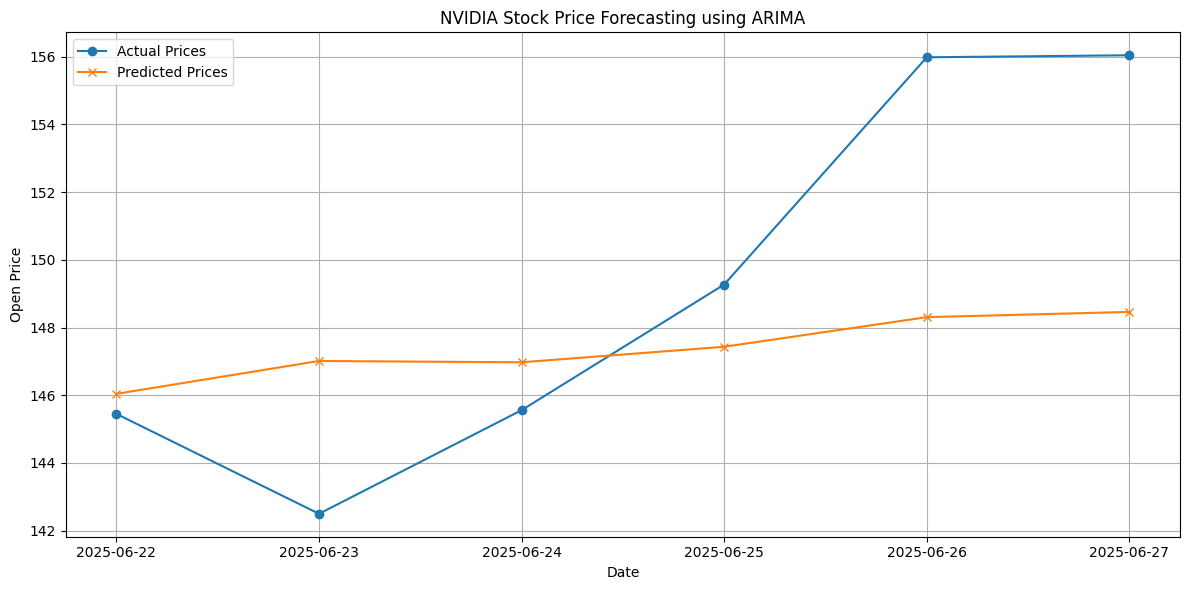

In [24]:
# Visualization
plt.figure(figsize=(12, 6))
# Plot actual prices, using the index for dates
plt.plot(test.index, test, label='Actual Prices', marker='o')
# Plot predicted prices, using the index for dates
plt.plot(forecast.index, forecast, label='Predicted Prices', marker='x')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('NVIDIA Stock Price Forecasting using ARIMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()